# Analyzing Word Frequencies in Executive Order Disposition Notes and Titles

We start by importing the necessary packages, reading in the data, and verifying/updating the format of the data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import spacy

ModuleNotFoundError: No module named 'spacy'

In [ ]:
EO = pd.read_csv("executive_orders.csv")

In [ ]:
import EO_processing.verify as verify
import EO_processing.additions as add

In [ ]:
count_type_incorrect = verify.verify_type(EO, 'Presidential Document')
if count_type_incorrect > 0:
    EO_type_verified = verify.fix_type(EO, 'Presidential Document')
    print('Dataframe modified to ensure type consistency.')
else:
    EO_type_verified = EO
    print('Types are consistent.')
    
count_subtype_incorrect = verify.verify_subtype(EO_type_verified, 'Executive Order') 
if count_subtype_incorrect > 0:
    EO_subtype_verified = verify.fix_subtype(EO_type_verified, 'Executive Order')
    print('Dataframe modified to ensure subtype consistency.')
else:
    EO_subtype_verified = EO_type_verified
    print('Subtypes are consistent.')
EO_with_years = add.add_years(EO_subtype_verified, 'signing_date')

### Frequency of "Revoked" in EO Disposition Notes

In [26]:
add.add_revoked_flag(EO_with_years)
count_revoked = EO_with_years.groupby("year")["is_revoked"].sum().reset_index()
count_revoked = count_revoked.reset_index()

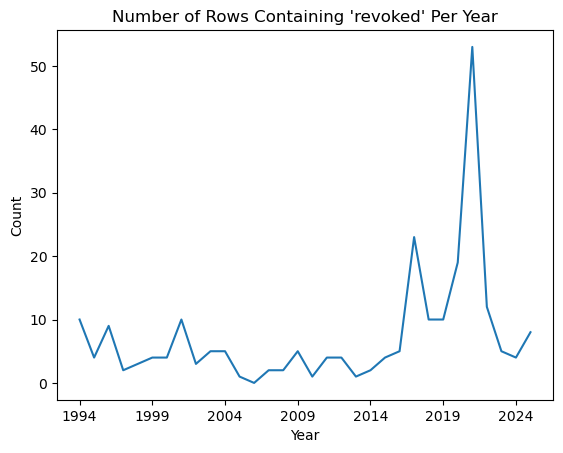

In [27]:
sns.lineplot(data=count_revoked, x="year", y="is_revoked")

plt.title("Number of Executive Order Names Containing 'revoked' Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(count_revoked['year'][::5])
plt.show()


### Frequency of "Amends" in EO Disposition Notes

In [28]:
add.add_amends_flag(EO_with_years)
count_amends = EO_with_years.groupby("year")["is_amendment"].sum().reset_index()
count_amends = count_amends.reset_index()

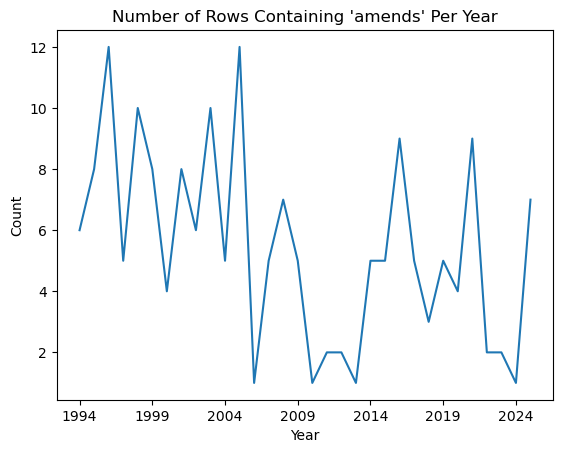

In [29]:
sns.lineplot(data=count_amends, x="year", y="is_amendment")

plt.title("Number of Executive Orders Containing 'amends' Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(count_amends['year'][::5])

plt.show()

### Frequency of Amends vs Revoked over time

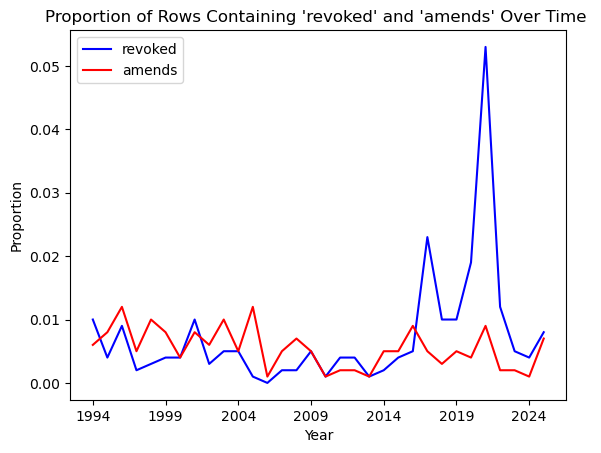

In [30]:
count_revoked['prop_revoked'] = count_revoked['is_revoked'] / len(EO_with_years)
count_amends['prop_amends'] = count_amends['is_amendment'] / len(EO_with_years)

sns.lineplot(data=count_revoked, x="year", y="prop_revoked", color="blue", label="revoked")
sns.lineplot(data=count_amends, x="year", y="prop_amends", color="red", label="amends")

plt.title("Proportion of Executive Orders Containing 'revoked' and 'amends' Over Time ")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.xticks(count_revoked['year'][::5])
plt.show()

### Most Common Tokens in EO Titles

In [31]:
nlp = spacy.load("en_core_web_sm")

In [32]:
all_titles = " ".join(EO['title'].tolist())

doc = nlp(all_titles)
words = [token.text.lower() for token in doc if not token.is_stop and token.is_alpha]
word_counts = Counter(words)
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

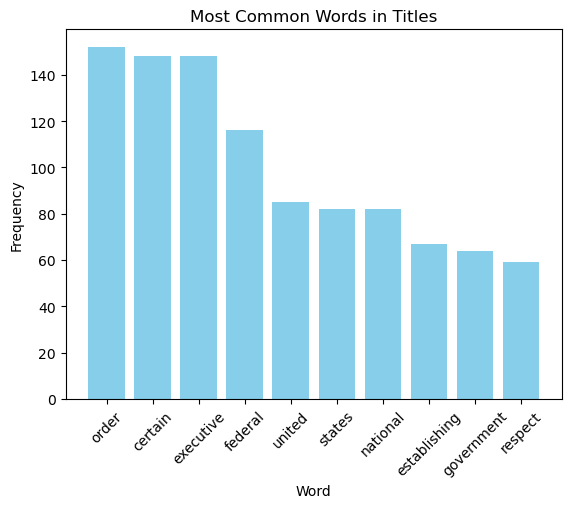

In [33]:
plt.bar(words, counts, color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Common Words in Executive Order Titles')
plt.xticks(rotation=45)
plt.show()